# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

importing Jupyter notebook from Header.ipynb


In [2]:
import import_ipynb
from SoilPrep import * 

importing Jupyter notebook from SoilPrep.ipynb


# Step 0: Setting up decision parameters (Data Tree)

In [3]:
# 0. Available smoothing filter types: savgol1 and savgol2 ------------------------ (0)
sg_filters = ['sg1', 'sg2']

# 0. Available window lengths for the smoothing filter ---------------------------- (0)
window_lengths = [0, 1, 11, 21, 31, 41, 51]

# 1. Available machine learning regression models --------------------------------- (1)
ml_methods = ['mult', 'cubist', 'svr',  'ridge', 'plsr', 'randomforest',  'gbrt']

# 2. Names of target variables in the dataframe ----------------------------------- (2)
target_names = ['Sand', 'Silt', 'Clay', 'TOC', 'CaCO3']

# 3. Available preprocessing for Target data -------------------------------------- (3)
#prepare_target = ['none', 'minmax']
prepare_target = ['none']
# 4. Available preprocessing for Spectral data ------------------------------------ (4)
prepare_spec = ['none', 'fod2', 'cr', 'log']

# 5. Resampling bands available for spectra --------------------------------------- (5) 
nbands_sampling = [0,2,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30,31,33,35,37,39, 40, 45, 50, 55, 60, 70, 80, 90, 100]


# Setting colours for different targets        --------------------------------------
clr = ['#F4A460', '#8B7355', '#A52A2A', 'green', 'blue']

# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [4]:
MetaData = {'sg_filters' : sg_filters, 'window_lengths' : window_lengths, 'prepare_spec' : prepare_spec, \
            'nbands_sampling' : nbands_sampling, 'target_names' : target_names, 'prepare_target' : prepare_target,\
            'ml_methods' : ml_methods, 'clr' : clr}

with open ('meta_data.pickle', 'wb') as file:
    pickle.dump(MetaData, file)

# Step 1a: Obtaining Spectra (Noise and Outliers removal)

In [5]:
legacy_spec = pd.read_csv('spectra.csv')
legacy_tar = pd.read_csv('targets.csv')

legacy_spec.rename(columns= {'sample':'id'}, inplace=True)
legacy_tar.rename(columns = {'SOIL': 'id', 'CLAI':'Clay', 'SILT': 'Silt', 'SAND': 'Sand', 'OC': 'TOC', 'CACO3':'CaCO3'}, inplace = True)

In [6]:
legacy_spec = legacy_spec.set_index('id', drop=True)
legacy_tar = legacy_tar.set_index('id', drop=True)

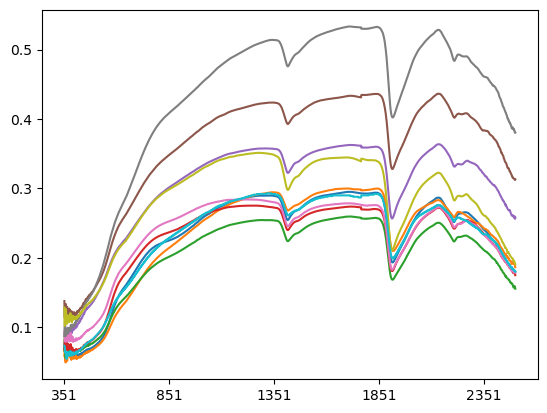

In [7]:
for i in range (0,10,1):
    legacy_spec.iloc[i,1:].plot()

In [8]:
legacy_spectra = legacy_spec.iloc[:, 51::].copy()
legacy_spectra.head(2)

,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1,0.060422,0.060022,0.059722,0.059322,0.058722,0.059922,0.062022,0.059722,0.059122,0.059022,0.058322,0.058622,0.059322,0.060522,0.059822,0.059722,0.060222,0.060539,0.059883,0.059122,0.059522,0.060422,0.060722,0.060222,0.060622,0.060722,0.060422,0.061322,0.061922,0.062422,0.062522,0.061822,0.061122,0.061022,0.061622,0.062222,0.062822,0.062822,0.062922,0.063322,0.063922,0.064522,0.064922,0.064922,0.064322,0.064122,0.064422,0.065022,0.065422,0.065722,...,0.198465,0.197661,0.196834,0.196530,0.196182,0.195595,0.195123,0.194908,0.194592,0.193903,0.193152,0.192428,0.191843,0.191818,0.191789,0.191838,0.191824,0.191501,0.191119,0.190578,0.19013,0.190035,0.189680,0.188474,0.187274,0.186151,0.185481,0.186149,0.186492,0.185993,0.185726,0.185862,0.186042,0.186245,0.186060,0.185331,0.184433,0.183245,0.182729,0.183108,0.182604,0.180906,0.179802,0.179577,0.179448,0.179298,0.179278,0.179380,0.179692,0.180275
A2,0.055970,0.057470,0.057470,0.055170,0.055470,0.057070,0.058970,0.055170,0.055080,0.055970,0.054570,0.055370,0.056270,0.056770,0.056670,0.056870,0.057270,0.057070,0.056670,0.056270,0.056670,0.057570,0.057770,0.056781,0.057570,0.057370,0.056370,0.057670,0.058234,0.058383,0.058544,0.058170,0.058070,0.058670,0.058970,0.059070,0.059016,0.059270,0.059570,0.059870,0.060170,0.060770,0.061270,0.061570,0.061570,0.061570,0.061570,0.062170,0.062170,0.062070,...,0.205569,0.205255,0.204990,0.205285,0.205434,0.204261,0.203190,0.202188,0.201262,0.201817,0.202313,0.202066,0.201720,0.200781,0.199900,0.199475,0.199150,0.199420,0.199386,0.198038,0.19689,0.196577,0.196325,0.196292,0.196133,0.195575,0.195193,0.195342,0.195309,0.194835,0.193872,0.191836,0.191037,0.192613,0.193641,0.193872,0.193701,0.192865,0.192286,0.192020,0.191992,0.192217,0.191915,0.191090,0.190970,0.191688,0.190903,0.188633,0.187193,0.186471


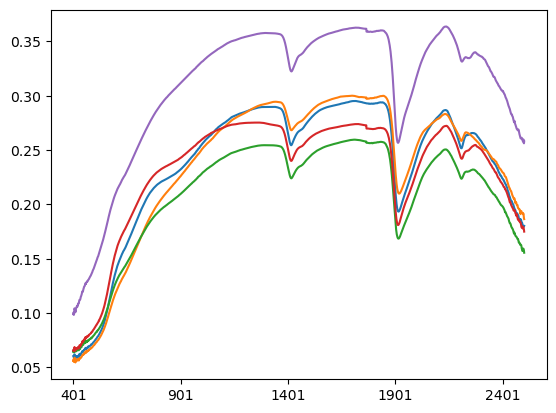

In [9]:
for i in range (0,5,1):
    legacy_spectra.iloc[i,:].plot()

In [10]:
legacy_tar = legacy_tar[['Clay', 'Silt', 'Sand', 'TOC', 'CaCO3']]
legacy_tar.head(2)

,Clay,Silt,Sand,TOC,CaCO3
id,,,,,
E1,13.9719,0.0000,86.0281,0.59,1.83
E2,8.8638,2.5181,88.6180,0.17,0.00


In [11]:
print(legacy_spectra.shape)
print(legacy_tar.shape)

# Note that some id are missing in the data so we will do preprocessing to fix it ---------

(89, 2100)
(91, 5)


In [12]:
# Missing ID's are taken care by setting the index to ID and obtaining inner join.


legacy_fr = pd.merge(legacy_tar, legacy_spectra, on = 'id', how = 'inner')

legacy_fr.reset_index(inplace = True)
legacy_fr .head(2)

,id,Clay,Silt,Sand,TOC,CaCO3,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,E1,13.9719,0.0000,86.0281,0.59,1.83,0.0498,0.0493,0.0495,0.0503,0.0510,0.0507,0.0498,0.0502,0.0499,0.0498,0.0510,0.0515,0.0516,0.0513,0.0515,0.0516,0.0516,0.0518,0.0515,0.0512,0.0514,0.0517,0.0521,0.0528,0.0535,0.0535,0.0529,0.0535,0.0539,0.0541,0.0543,0.0551,0.0558,0.0559,0.0563,0.0563,0.0559,0.0567,0.0570,0.0572,0.0576,0.0579,0.0581,0.0585,...,0.35,0.349,0.348,0.347,0.346,0.345,0.345,0.344,0.343,0.343,0.342,0.342,0.341,0.340,0.339,0.339,0.338,0.338,0.337,0.337,0.336,0.335,0.334,0.333,0.333,0.332,0.332,0.331,0.330,0.329,0.328,0.328,0.327,0.327,0.327,0.326,0.326,0.325,0.325,0.324,0.323,0.323,0.322,0.321,0.321,0.321,0.32,0.319,0.319,0.32
1,E2,8.8638,2.5181,88.6180,0.17,0.00,0.0535,0.0535,0.0530,0.0523,0.0524,0.0521,0.0517,0.0522,0.0530,0.0534,0.0523,0.0521,0.0522,0.0526,0.0532,0.0537,0.0539,0.0536,0.0538,0.0542,0.0541,0.0547,0.0551,0.0550,0.0552,0.0553,0.0552,0.0557,0.0561,0.0565,0.0569,0.0567,0.0570,0.0586,0.0579,0.0580,0.0590,0.0592,0.0596,0.0601,0.0604,0.0608,0.0612,0.0613,...,0.38,0.380,0.379,0.378,0.378,0.377,0.376,0.375,0.374,0.374,0.373,0.372,0.372,0.371,0.370,0.370,0.370,0.369,0.368,0.367,0.366,0.365,0.365,0.364,0.364,0.363,0.362,0.362,0.361,0.360,0.359,0.358,0.358,0.357,0.357,0.356,0.356,0.356,0.356,0.355,0.354,0.354,0.353,0.352,0.351,0.350,0.35,0.351,0.351,0.35


In [13]:
print('Missing:', legacy_fr.isnull().sum().sum())   # alternate to previous (inferred from next command)
print(legacy_fr.isnull().sum()) # isnull applies to df but isnan applies only to ndarray

legacy_fr.dropna(axis=0, inplace = True)

Missing: 3
id      0
Clay    1
Silt    1
Sand    1
TOC     0
       ..
2496    0
2497    0
2498    0
2499    0
2500    0
Length: 2106, dtype: int64


In [14]:
spectra = legacy_fr.iloc[:, 6::]
spectra.head(2)

,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0498,0.0493,0.0495,0.0503,0.0510,0.0507,0.0498,0.0502,0.0499,0.0498,0.0510,0.0515,0.0516,0.0513,0.0515,0.0516,0.0516,0.0518,0.0515,0.0512,0.0514,0.0517,0.0521,0.0528,0.0535,0.0535,0.0529,0.0535,0.0539,0.0541,0.0543,0.0551,0.0558,0.0559,0.0563,0.0563,0.0559,0.0567,0.0570,0.0572,0.0576,0.0579,0.0581,0.0585,0.0596,0.0601,0.0599,0.0602,0.0604,0.0604,...,0.35,0.349,0.348,0.347,0.346,0.345,0.345,0.344,0.343,0.343,0.342,0.342,0.341,0.340,0.339,0.339,0.338,0.338,0.337,0.337,0.336,0.335,0.334,0.333,0.333,0.332,0.332,0.331,0.330,0.329,0.328,0.328,0.327,0.327,0.327,0.326,0.326,0.325,0.325,0.324,0.323,0.323,0.322,0.321,0.321,0.321,0.32,0.319,0.319,0.32
1,0.0535,0.0535,0.0530,0.0523,0.0524,0.0521,0.0517,0.0522,0.0530,0.0534,0.0523,0.0521,0.0522,0.0526,0.0532,0.0537,0.0539,0.0536,0.0538,0.0542,0.0541,0.0547,0.0551,0.0550,0.0552,0.0553,0.0552,0.0557,0.0561,0.0565,0.0569,0.0567,0.0570,0.0586,0.0579,0.0580,0.0590,0.0592,0.0596,0.0601,0.0604,0.0608,0.0612,0.0613,0.0616,0.0619,0.0624,0.0628,0.0630,0.0632,...,0.38,0.380,0.379,0.378,0.378,0.377,0.376,0.375,0.374,0.374,0.373,0.372,0.372,0.371,0.370,0.370,0.370,0.369,0.368,0.367,0.366,0.365,0.365,0.364,0.364,0.363,0.362,0.362,0.361,0.360,0.359,0.358,0.358,0.357,0.357,0.356,0.356,0.356,0.356,0.355,0.354,0.354,0.353,0.352,0.351,0.350,0.35,0.351,0.351,0.35


# Step 1b: Obtaining Targets (Outliers removal and Normalization)

In [15]:
df = legacy_fr
# ------------- Target Isolation ----------------------

clr = ['#F4A460', '#8B7355', '#A52A2A', 'green', 'blue']

def isolate_targets(df, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(df[target_names[i]])
    return(T)
    
T = isolate_targets(df,target_names) 

def normalize_targets(T):          
    NT =[]
    for i in range(0, len(T)):
        NT.append(min_max_normal(T[i].copy()))
    return(NT)

NT = normalize_targets(T)


def find_y(t):
    i = target_names.index(t) 
    y = T[i]
    return y

# Step 1c: Spectra Preprocessing (Smooth, FOD/Contin/Log , and Resample)

## Savgol smoothing (order 1 and order 2)

In [16]:
# -------------- Smoothed Spectra spec1 (savgol order 1) and spec2 (savgol order 2)  -----------

spec1 = {}
for i in window_lengths:
    spec1[i] = filt_sg(spectra, i, 'sg1')                   

spec2 = {}
for i in window_lengths:
    spec2[i] = filt_sg(spectra, i, 'sg2')

smth_spec = sgsmooth (spectra, 3)    

## First Order Derivative

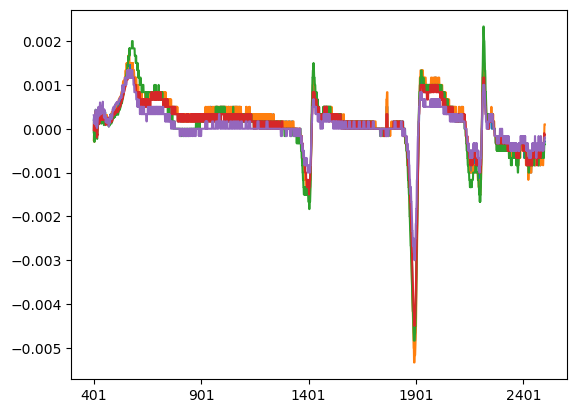

In [17]:
fod_spec = fod(smth_spec)

for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()


## Continuum Removal

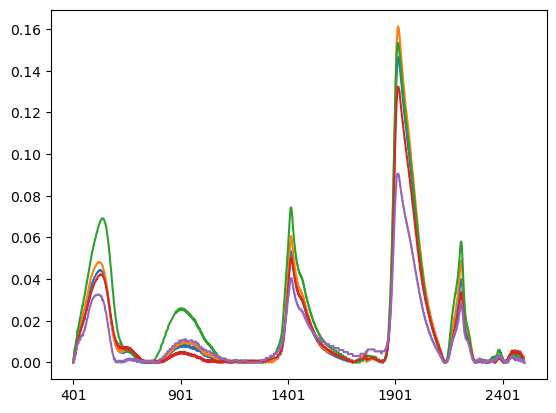

In [18]:
cr_spec = continuum_removed(spec2[51])

for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()
    

## log(1/R) Transformation

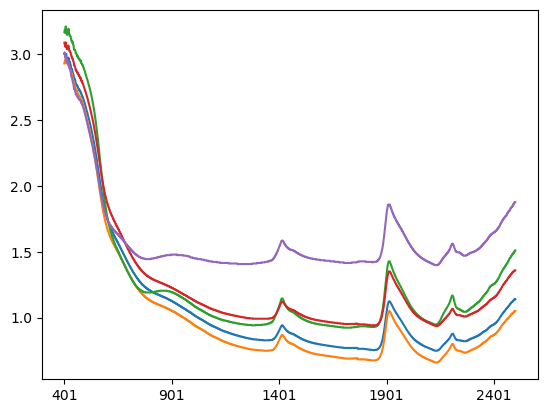

In [19]:
log_spec = ((1/spec2[51]).apply(np.log)).copy()
#log_spec.head(5)

for i in range (0,5,1):
    log_spec.iloc[i,:].plot()   

## Resampling (n_bands)

### 1. Sampled Original (sampled_spec: sampled clipped_spectra)

In [20]:
sampled_spec = {}
for n in nbands_sampling:
    sampled_spec[n] = resample_spectra (spec2[51], n)

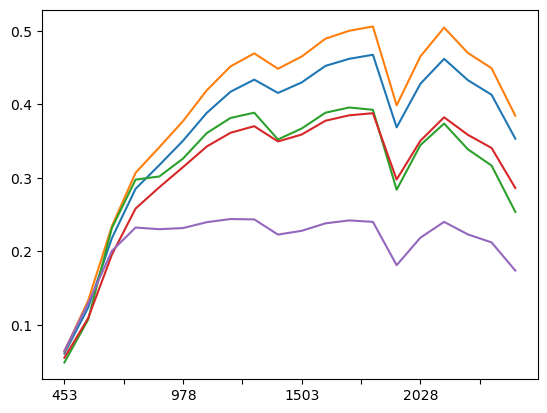

In [21]:
for i in range (0,5,1):
    sampled_spec[20].iloc[i,:].plot()

### 2. Sampled Continuum Removed  (sampled_cr)

In [22]:
sampled_cr = {}
for n in nbands_sampling:
    sampled_cr[n] = resample_spectra (cr_spec, n)

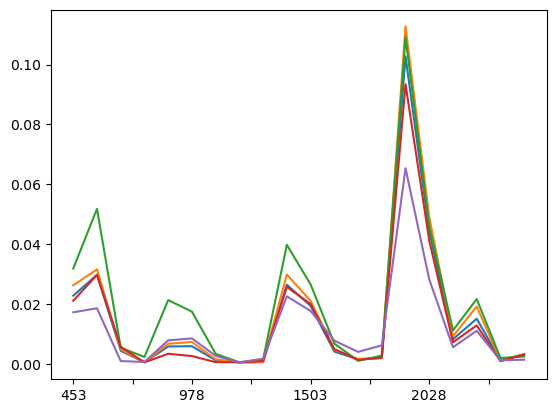

In [23]:
for i in range (0,5,1):
    sampled_cr[20].iloc[i,:].plot()

### 3. Sampled FOD  (fod_sampled)

In [24]:
fod_sampled = {}
for n in nbands_sampling:
    fod_sampled[n] = fod (sampled_spec[n])

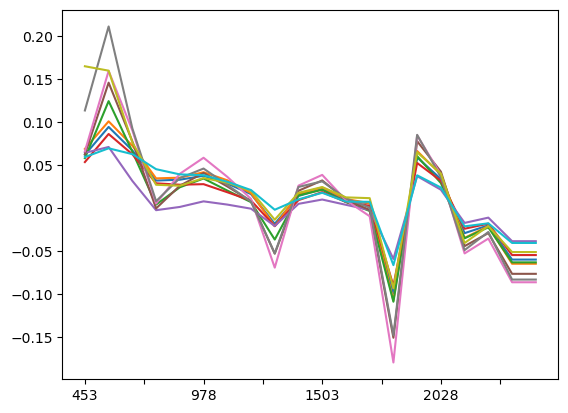

In [25]:
for i in range (0,10,1):
    fod_sampled[20].iloc[i,:].plot()

## 4. Sampled Log (sampled_log)

In [26]:
sampled_log = {}
for n in nbands_sampling:
    sampled_log[n] = resample_spectra (log_spec, n)

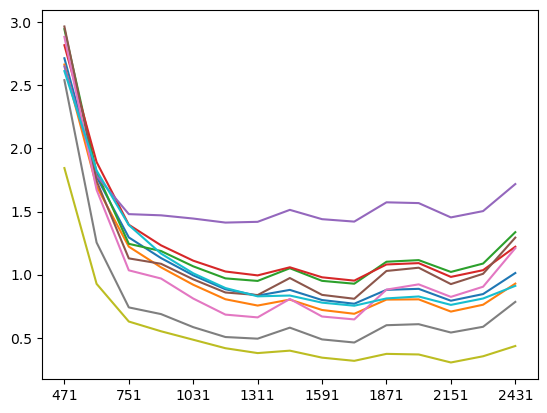

In [27]:
for i in range (0,10,1):
    sampled_log[15].iloc[i,:].plot()

## Visualizing Processed Spectrum (variable samples)

In [28]:
def plot_spec (sample, process):
    x1 = spec2[51].iloc[sample,:]
    x1.plot()
    if process == 'cr':
        x2 = cr_spec.iloc[sample,:]
        x2.plot()
    elif process == 'fod2':
        x3 = fod_spec.iloc[sample,:]*100
        x3.plot()
    else:
        x4 = log_spec.iloc[sample,:]/3
        x4.plot()
        
    plt.ylim([-0.6, 0.9])

ipywidgets.interact(plot_spec, sample = (0, 85,1), process = prepare_spec)

interactive(children=(IntSlider(value=42, description='sample', max=85), Dropdown(description='process', optio…

<function __main__.plot_spec(sample, process)>

## Correlation between wavelengths and Targets

In [29]:
plt.style.use(['science','notebook','grid'])

def plot_corr (target, prepare, n_bands):
    
    i = target_names.index(target)    
    
    if  prepare == 'spec':
        r_val, p_val = find_rpval (sampled_spec[n_bands], T[i])
        r_val.iloc[0,:].plot(color = clr[i])
    elif  prepare == 'cr':
        r_cr, p_cr = find_rpval (sampled_cr[n_bands], T[i])
        r_cr.iloc[0,:].plot(color = clr[i])
    elif prepare == 'fod2':    
        r_fod, p_fod = find_rpval (fod_sampled[n_bands], T[i])
        r_fod.iloc[0,:].plot(color = clr[i])    
    else:
        r_log, p_log = find_rpval (sampled_log[n_bands], T[i])
        r_log.iloc[0,:].plot(color = clr[i])
    
    plt.ylim([-0.9, 0.9])


ipywidgets.interact(plot_corr, target = target_names, prepare = prepare_spec, n_bands = nbands_sampling)



interactive(children=(Dropdown(description='target', options=('Sand', 'Silt', 'Clay', 'TOC', 'CaCO3'), value='…

<function __main__.plot_corr(target, prepare, n_bands)>

# Step 2:  Parameters for Best Train-Test Split  

In [30]:
tst_siz = 0.20

rand_t = [None] * (len(T))
err_t = [None] * (len(T))

print('Without Normalization:')
for i in range (0,len(T)):
    rand_t[i], err_t[i] = best_split(spectra.copy(), T[i], tst_siz) 
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_t[i], '\t at randome state =', rand_t[i])
    
rand_nt = [None] * (len(T))
err_nt = [None] * (len(T))

print('After Normalization:')
for i in range (0,len(T)):
    rand_nt[i], err_nt[i] = best_split(spectra.copy(), NT[i], tst_siz)     
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_nt[i], '\t at randome state =', rand_nt[i])
    
    

Without Normalization:
For Sand :test size = 0.2 	 min bin error= 27.5 	 at randome state = 41
For Silt :test size = 0.2 	 min bin error= 20.0 	 at randome state = 34
For Clay :test size = 0.2 	 min bin error= 17.5 	 at randome state = 13
For TOC :test size = 0.2 	 min bin error= 12.5 	 at randome state = 20
For CaCO3 :test size = 0.2 	 min bin error= 22.5 	 at randome state = 17
After Normalization:
For Sand :test size = 0.2 	 min bin error= 27.5 	 at randome state = 41
For Silt :test size = 0.2 	 min bin error= 20.0 	 at randome state = 34
For Clay :test size = 0.2 	 min bin error= 17.5 	 at randome state = 13
For TOC :test size = 0.2 	 min bin error= 10.0 	 at randome state = 27
For CaCO3 :test size = 0.2 	 min bin error= 22.5 	 at randome state = 17


In [31]:
Data = {'spectra' : spec2[51], 'T' : T, 'NT' : NT, 'spec1': spec1, 'spec2': spec2, 'smth_spec' : smth_spec, 'fod_spec' : fod_spec,  \
       'cr_spec' : cr_spec,  'log_spec' : log_spec, 'sampled_spec' : sampled_spec, 'sampled_cr' : sampled_cr, \
        'fod_sampled' : fod_sampled, 'sampled_log' : sampled_log, 'rand_t' : rand_t, 'rand_nt' : rand_nt}

In [32]:
with open ('data.pickle', 'wb') as file:
    pickle.dump(Data, file)